In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Label encoding

In [3]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

data[varlist] = data[varlist].apply(binary_map)
data['furnishingstatus'] = data['furnishingstatus'].replace({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


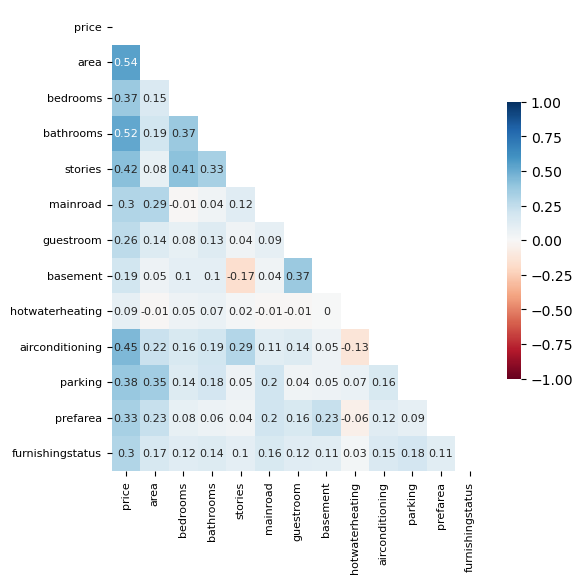

In [48]:
plt.figure(figsize=(6,6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
hm = sns.heatmap(data.corr().round(2), annot=True, cmap='RdBu', mask=mask, vmin=-1, vmax=1, annot_kws={"fontsize": 8}, cbar_kws={"shrink": .6})
hm.set_xticklabels(hm.get_xticklabels(), fontsize=8)
hm.set_yticklabels(hm.get_yticklabels(), fontsize=8)
plt.show()

El objetivo es conocer el precio de una vivienda

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = data['price']
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'R2: {lm.score(X_test, y_test):.2f}')

mean_er = abs(lm.predict(X_test)-y_test).mean()
error_perc = (mean_er/y_test.mean())*100
print(f'Error medio : {mean_er:.2f}')
print(f'Porcentaje de error: {error_perc:.2f}%')


R2: 0.68
Error medio : 785186.80
Porcentaje de error: 16.88%


In [65]:
# # # # El tema de la estandarizacion ??? ayuda en algo ????

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_s_stand = scaler.fit_transform(X)
X_s_stand = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train_s_stand, X_test_s_stand, y_train_s_stand, y_test_s_stand = train_test_split(X_s_stand, y, test_size=0.2, random_state=100)

lm = LinearRegression()
lm.fit(X_train_s_stand, y_train)
print(lm.score(X_test_s_stand, y_test_s_stand))

# data_s = pd.concat((y, X_s_stand), axis=1)
# plt.figure(figsize=(8,8))
# mask = np.triu(np.ones_like(data_s.corr(), dtype=bool))
# sns.heatmap(data.corr().round(2), annot=True, cmap='RdBu', mask=mask, vmin=-1, vmax=1)
# plt.show()


0.6763309062082214
